In [1]:
!pip install patchify

In [1]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from patchify import patchify, unpatchify

In [19]:
# Load the dataset
def load_2Dimages(folder):
    images = []
    # Keep the information of axis z (each slice)
    file_list = sorted(file for file in os.listdir(folder) if file.endswith('.png'))

    for filename in file_list:
        path = os.path.join(folder, filename)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # grayscale
        if img is not None:
            images.append(img)
    return np.array(images)

# No patch anymore for 2D
def patch_original(folder_path):
    images2D = load_2Dimages(folder_path)
    original = np.stack((images2D,)*3, axis=-1)
    
    return original

def patch_mask(folder_path):
    images2D = load_2Dimages(folder_path)
    mask_2_channels = np.zeros(images2D.shape + (2,))
    indices_greater_than_0_5 = np.where(images2D > 5)
    for idx in zip(*indices_greater_than_0_5):
        mask_2_channels[idx[0],idx[1],idx[2],0] = 1

    indices_smaller_than_0_5 = np.where(images2D < 5)
    for idx in zip(*indices_smaller_than_0_5):
        mask_2_channels[idx[0],idx[1],idx[2],1] = 1

    return mask_2_channels

In [20]:
# Training set
path_train_original = "/Users/yichunsun/Desktop/TFM/Data/2D/Training/Original"
path_train_mask = "/Users/yichunsun/Desktop/TFM/Data/2D/Training/Mask"

# Validation set
path_validation_original = "/Users/yichunsun/Desktop/TFM/Data/2D/Validation/Original"
path_validation_mask = "/Users/yichunsun/Desktop/TFM/Data/2D/Validation/Mask"

# Test set
path_test_original = "/Users/yichunsun/Desktop/TFM/Data/2D/Test/Original"
path_test_mask = "/Users/yichunsun/Desktop/TFM/Data/2D/Test/Mask"

In [21]:
# Training set
train_original_2D = patch_original(path_train_original)
train_mask_2D = patch_mask(path_train_mask)

# Validation set
validation_original_2D = patch_original(path_validation_original)
validation_mask_2D = patch_mask(path_validation_mask)

# Test set
test_original_2D = patch_original(path_test_original)
test_mask_2D = patch_mask(path_test_mask)

In [32]:
# Save the data of 3D images
np.save('/Users/yichunsun/Desktop/TFM/Data/2D/2D_npy_files/2D_train_original.npy', train_original_2D)
np.save('/Users/yichunsun/Desktop/TFM/Data/2D/2D_npy_files/2D_train_mask.npy', train_mask_2D)
np.save('/Users/yichunsun/Desktop/TFM/Data/2D/2D_npy_files/2D_validation_original.npy', validation_original_2D)
np.save('/Users/yichunsun/Desktop/TFM/Data/2D/2D_npy_files/2D_validation_mask.npy', validation_mask_2D)
np.save('/Users/yichunsun/Desktop/TFM/Data/2D/2D_npy_files/2D_test_original.npy', test_original_2D)
np.save('/Users/yichunsun/Desktop/TFM/Data/2D/2D_npy_files/2D_test_mask.npy', test_mask_2D)

In [22]:
# Check the dimensions
print("Dimension of the training 2D original image:", train_original_2D.shape)
print("Dimension of the mask of training set:", train_mask_2D.shape)
print("Dimension of the validation 2D original image:", validation_original_2D.shape)
print("Dimension of the mask of validation set:", validation_mask_2D.shape)
print("Dimension of the test 2D original image:", test_original_2D.shape)
print("Dimension of the mask of test set:", test_mask_2D.shape)

Dimension of the training 2D original image: (470, 512, 512, 3)
Dimension of the mask of training set: (470, 512, 512, 2)
Dimension of the validation 2D original image: (65, 512, 512, 3)
Dimension of the mask of validation set: (65, 512, 512, 2)
Dimension of the test 2D original image: (70, 512, 512, 3)
Dimension of the mask of test set: (70, 512, 512, 2)


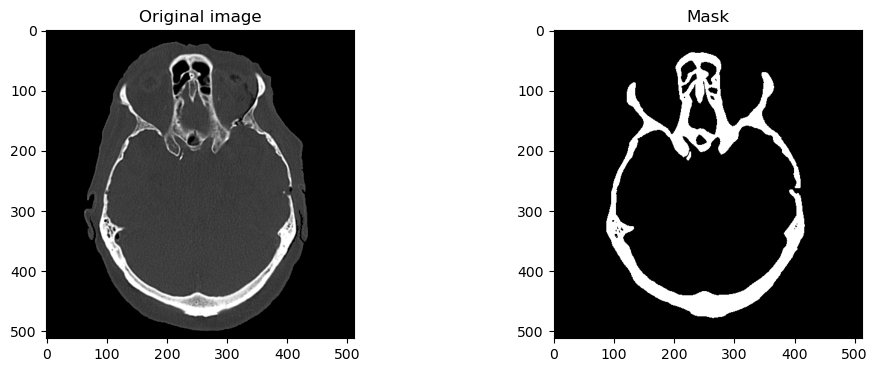

In [31]:
# Check the images 2D
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(train_original_2D[265,:,:,0], cmap='gray')
axes[0].set_title('Original image')

axes[1].imshow(train_mask_2D[265,:,:,0], cmap='gray')
axes[1].set_title('Mask')
    
plt.show()